In [23]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [24]:
df=pd.read_csv('wine.csv')

In [25]:
df.shape

(6497, 13)

In [26]:
list(df.columns)

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [27]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [28]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [29]:
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].mean())
df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].mean())
df['citric acid'] = df['citric acid'].fillna(df['citric acid'].mode()[0])
df['residual sugar'] = df['residual sugar'].fillna(df['residual sugar'].mode()[0])
df['chlorides'] = df['chlorides'].fillna(df['chlorides'].mean())
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['sulphates'] = df['sulphates'].fillna(df['sulphates'].mean())

In [30]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6, 8, 9)
group_names = ['bad', 'good', 'excellent']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [32]:
label_quality = LabelEncoder()

In [33]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [34]:
df['quality'].value_counts()

0    5220
2    1272
1       5
Name: quality, dtype: int64

In [35]:
df['type']=label_quality.fit_transform(df['type'])


In [36]:
#Now seperate the dataset as response variable and feature variabes
X = df.drop('quality', axis = 1)
y = df['quality']

In [37]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [38]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score of KNN:",accuracy_score(y_test,y_pred1))

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

Accuracy Score of KNN: 0.8561538461538462


array([[971,  77],
       [110, 142]], dtype=int64)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

print("Accuracy Score of decission tree:",accuracy_score(y_test,y_pred3))

confusion_matrix(y_test, y_pred3)

Accuracy Score of decission tree: 0.8276923076923077


array([[933,   1, 114],
       [  0,   0,   0],
       [109,   0, 143]], dtype=int64)

[Text(0.3968028966608965, 0.9807692307692307, 'alcohol <= 0.117\nentropy = 0.725\nsamples = 5197\nvalue = [4172, 5, 1020]'),
 Text(0.14522594752186588, 0.9423076923076923, 'volatile acidity <= -0.824\nentropy = 0.408\nsamples = 3105\nvalue = [2854, 1, 250]'),
 Text(0.0478134110787172, 0.9038461538461539, 'alcohol <= -1.214\nentropy = 0.771\nsamples = 536\nvalue = [415, 0, 121]'),
 Text(0.01282798833819242, 0.8653846153846154, 'residual sugar <= 1.498\nentropy = 0.964\nsamples = 72\nvalue = [28, 0, 44]'),
 Text(0.006997084548104956, 0.8269230769230769, 'residual sugar <= 0.575\nentropy = 0.439\nsamples = 22\nvalue = [20, 0, 2]'),
 Text(0.004664723032069971, 0.7884615384615384, 'chlorides <= -0.38\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]'),
 Text(0.0023323615160349854, 0.75, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.006997084548104956, 0.75, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.009329446064139942, 0.7884615384615384, 'entropy = 0.0\nsamples = 

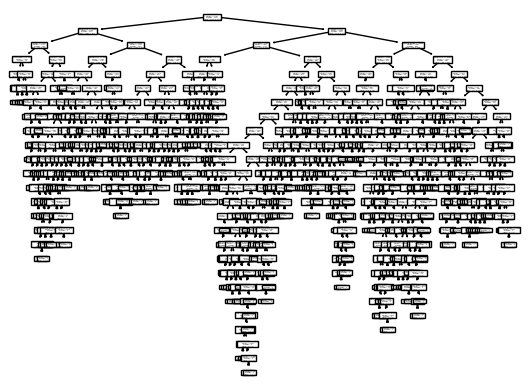

In [46]:
tree.plot_tree(model3,feature_names = ['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol'])

In [43]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)


print("Accuracy Score:",accuracy_score(y_test,y_pred4))

confusion_matrix(y_test, y_pred4)

Accuracy Score: 0.8876923076923077


array([[1015,   33],
       [ 113,  139]], dtype=int64)